# Manifold Toy Datasets

> Collection of toy datasets sampling from ideal manifolds

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FlowNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# hide
from FlowNet.datasets import (
    plot_directed_3d,
    directed_circle, directed_spiral, directed_spiral_uniform, directed_spiral_sklearn,
    directed_cylinder, directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_sklearn,
    directed_sin, directed_sin_ribbon, directed_sinh_branch,
    directed_torus, directed_sphere
)

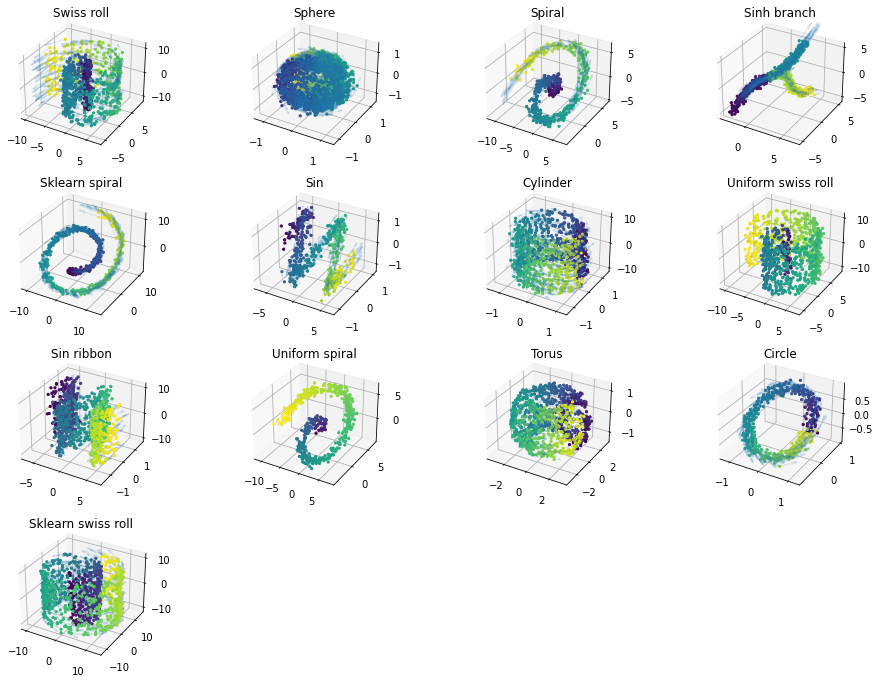

In [ ]:
# hide_input
func_set = {
    ("Circle"               , lambda: directed_circle(xtilt=np.pi/4, sigma=0.1)         ),
    ("Spiral"               , lambda: directed_spiral(xtilt=np.pi/4, sigma=0.5)         ),
    ("Uniform spiral"       , lambda: directed_spiral_uniform(xtilt=np.pi/4, sigma=0.5),),
    ("Sklearn spiral"       , lambda: directed_spiral_sklearn(xtilt=np.pi/4, sigma=0.5),),
    ("Cylinder"             , lambda: directed_cylinder(sigma=0.1),                     ),
    ("Swiss roll"           , lambda: directed_swiss_roll(sigma=0.3),                   ),
    ("Uniform swiss roll"   , lambda: directed_swiss_roll_uniform(sigma=0.3),           ),
    ("Sklearn swiss roll"   , lambda: directed_swiss_roll_sklearn(sigma=0.3),           ),
    ("Sin"                  , lambda: directed_sin(xtilt=np.pi/4, sigma=0.2),           ),
    ("Sin ribbon"           , lambda: directed_sin_ribbon(sigma=0.2),                   ),
    ("Sinh branch"          , lambda: directed_sinh_branch(xtilt=np.pi/4, sigma=0.2),   ),
    ("Torus"                , lambda: directed_torus(noise=0.1),                        ),
    ("Sphere"               , lambda: directed_sphere(noise=0.1)                        )
}
num_func = len(func_set)
num_col = 4
num_row = int(np.ceil(num_func/num_col))
fig = plt.figure(figsize=(4*num_col, 3*num_row))
for i, func in enumerate(func_set):
    name, call = func
    ax = fig.add_subplot(num_row, num_col, i+1, projection="3d")
    X, flows, labels = call()
    plot_directed_3d(X, flows, labels, mask_prob=0.5, ax=ax)
    ax.set_title(name, y=1.0)